# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Project Capstone Web-Scrapping using Beautifulsoup merupakan salah satu capstone project dari Algoritma Academy Data Analytics Specialization. Dengan mengerjakan project ini diharapkan para peserta pelatihan akan memahami lebih dalam mengenai teknik mengambil data/informasi yang bersumber dari web yang bersifat publik atau dapat diakses secara umum. Adapun deliverables yang diharapkan dari projek ini dari para peserta pelatihan adalah melakukan webscrapping secara simplel untuk mendapatkan informasi
juga akan memanfaatkan flask dashboard sederhana untuk menampilkan hasil scrap dan visualisasinya)

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

Penjelasan:
1. untuk mengambil data/informasi supaya efesien perlu di batasi bagian spesifik seperti tabel atau yang lainnya pada laman web.
2. fungsi yang digunakan adalah .find() dari library BeautifulSoup dengan menambahakan kata kunci yang identik dari data/informasi yang akan diambil
3. kita juga bisa menggunakan fungsi .prettify() untuk membantu kita melihat cooding html menjadi lebih terstruktur sehingga budah di baca dan akan lebih mudah untuk menganalisa posisi data/informasi yang akan di ambil/dipindahkan ke data frame. 

In [40]:
#menampung data scrapping 
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[0:500])

<table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    7/6/2022
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-6-2022">
     14,996.82520
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-6-2022">
     USD IDR rate for 7/6/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/5/2022
   </td>
   <td>
    Tuesday
   </td>
   <td>
    <a href="/Rate/USD/IDR


In [42]:
# pastikan data/informasi hasil scrapping sudah sesuai dengan data/informasi di web
table.find_all('tr')[1].text
table.find_all('tr')[128].text

'1/7/2022Friday14,318.75000 IDRUSD IDR rate for 1/7/2022'

Finding row length.

In [7]:
# menghitung jumlah baris data
baris = table.find_all('tr')
row_length = len(baris)
row_length

129

Do the scrapping process here (please change this markdown with your explanation)

Penjelasan:
1. Sebelum melakukan scrapping perlu kita pastikan posisi data yang akan diambil karena bisa saja berada pada sebuah tabel (terpisah kolom) sehingga datanya sudah terpisah atau dijadikan satu kolom seperti data di atas.
2. perlu dipasikan juga posisi data/informasi terakhir hasil scrapping sudah sesuai dengan data/informasi yang ada di web.

In [43]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    #get tanggal 
    Tanggal = table.find_all('td')[(i*4)+0].text

    #get hari ## informasi ini tidak perlu diambil, kedepan jika dibutuhkan bisa diekstrak dari tanggal
    #hari = table.find_all('td')[(i*4)+1].text
    #hari = hari.strip() #to remove excess white space

    #get nilai kurs
    Kurs = table.find_all('td')[(i*4)+2].text
    Kurs = Kurs.strip() #to remove excess white space
    
    #get keterangan ## informasi ini tidak perlu diambil karena informasinya duplicate dengan informasi tanggal
    #kurs = table.find_all('td')[(i*4)+2].text
    #kurs = kurs.strip() #to remove excess white space

    temp.append((Tanggal,Kurs)) 
temp


[('7/6/2022', '14,996.82520 IDR'),
 ('7/5/2022', '15,014.65000 IDR'),
 ('7/4/2022', '14,994.55000 IDR'),
 ('7/1/2022', '14,975.15000 IDR'),
 ('6/30/2022', '14,928.80000 IDR'),
 ('6/29/2022', '14,868.90000 IDR'),
 ('6/28/2022', '14,852.35000 IDR'),
 ('6/27/2022', '14,807.70000 IDR'),
 ('6/24/2022', '14,829.50000 IDR'),
 ('6/23/2022', '14,848.80000 IDR'),
 ('6/22/2022', '14,833.90000 IDR'),
 ('6/21/2022', '14,833.60000 IDR'),
 ('6/20/2022', '14,827.75000 IDR'),
 ('6/17/2022', '14,838.85000 IDR'),
 ('6/16/2022', '14,809.20000 IDR'),
 ('6/15/2022', '14,695.10000 IDR'),
 ('6/14/2022', '14,764.20000 IDR'),
 ('6/13/2022', '14,782.80000 IDR'),
 ('6/10/2022', '14,614.95000 IDR'),
 ('6/9/2022', '14,611.85000 IDR'),
 ('6/8/2022', '14,513.20000 IDR'),
 ('6/7/2022', '14,465.30000 IDR'),
 ('6/6/2022', '14,437.70000 IDR'),
 ('6/3/2022', '14,433.50000 IDR'),
 ('6/2/2022', '14,435.00000 IDR'),
 ('6/1/2022', '14,555.60000 IDR'),
 ('5/31/2022', '14,580.63428 IDR'),
 ('5/30/2022', '14,538.55000 IDR'),
 ('

In [44]:
#membalik urutan data
temp = temp[::-1]
temp

[('1/7/2022', '14,318.75000 IDR'),
 ('1/10/2022', '14,290.15000 IDR'),
 ('1/11/2022', '14,284.46501 IDR'),
 ('1/12/2022', '14,298.95000 IDR'),
 ('1/13/2022', '14,309.00000 IDR'),
 ('1/14/2022', '14,314.55000 IDR'),
 ('1/17/2022', '14,331.25000 IDR'),
 ('1/18/2022', '14,358.70000 IDR'),
 ('1/19/2022', '14,362.85000 IDR'),
 ('1/20/2022', '14,327.60000 IDR'),
 ('1/21/2022', '14,329.75000 IDR'),
 ('1/24/2022', '14,350.70000 IDR'),
 ('1/25/2022', '14,330.55000 IDR'),
 ('1/26/2022', '14,366.45000 IDR'),
 ('1/27/2022', '14,395.00000 IDR'),
 ('1/28/2022', '14,383.40000 IDR'),
 ('1/31/2022', '14,339.40000 IDR'),
 ('2/1/2022', '14,328.30000 IDR'),
 ('2/2/2022', '14,355.35000 IDR'),
 ('2/3/2022', '14,387.00000 IDR'),
 ('2/4/2022', '14,400.70000 IDR'),
 ('2/7/2022', '14,394.90000 IDR'),
 ('2/8/2022', '14,386.75000 IDR'),
 ('2/9/2022', '14,334.30000 IDR'),
 ('2/10/2022', '14,357.00000 IDR'),
 ('2/11/2022', '14,344.75000 IDR'),
 ('2/14/2022', '14,303.45000 IDR'),
 ('2/15/2022', '14,265.45000 IDR'),


## Creating data frame & Data wrangling

Put the array into dataframe

In [45]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Tanggal','Kurs'))
df.head(10)

,tanggal,kurs
0,1/7/2022,"14,318.75000 IDR"
1,1/10/2022,"14,290.15000 IDR"
2,1/11/2022,"14,284.46501 IDR"
3,1/12/2022,"14,298.95000 IDR"
4,1/13/2022,"14,309.00000 IDR"
5,1/14/2022,"14,314.55000 IDR"
6,1/17/2022,"14,331.25000 IDR"
7,1/18/2022,"14,358.70000 IDR"
8,1/19/2022,"14,362.85000 IDR"
9,1/20/2022,"14,327.60000 IDR"


In [46]:
df.dtypes

tanggal    object
kurs       object
dtype: object

In [52]:
#menyesuaikan kondisi data termasuk type datanya 
df['Kurs'] = df['Kurs'].str.replace(" IDR","")
df['Kurs'] = df['Kurs'].str.replace(",","")
df['Kurs'] = df['Kurs'].astype('float64')
df['Tanggal'] = df['Tanggal'].astype('datetime64')

df.dtypes


kurs    float64
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

Penjelasan: 
1. Setelah data dipindahkan ke data frame, perlu diperhatikan type data dan kondisi data sehingga perlu disesuaikan untuk keperluan analisa dan proses selanjutnya.
2. Yang perlu disesuaikan adalah data kurs, masih ada tanda koma (,) dan karakter IDR
3. Tanda koma (,) dan karakter IDR perlu dihilangkan, tapi perlu diperhatikan terkait spasi pada awal karakter IDR, harus dihilangkan juga.
4. Sedangkan untuk type data juga harus disesuaikan, untuk tanggal menjadi datetime64 dan kurs menjadi float64 dari sebelumnya adalah type object.
5. Selanjutnya untuk memudahkan membuat grafik, tanggal dijadikan index data frame

In [48]:
#set tanggal menjadi index
df = df.set_index('Tanggal')
df.head()

,kurs
tanggal,
2022-01-07,14318.75000
2022-01-10,14290.15000
2022-01-11,14284.46501
2022-01-12,14298.95000
2022-01-13,14309.00000


In [49]:
df.tail()

,kurs
tanggal,
2022-06-30,14928.8000
2022-07-01,14975.1500
2022-07-04,14994.5500
2022-07-05,15014.6500
2022-07-06,14996.8252


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

Penjelasan:
1. Pemilihan chart mempertimbangkan karakteristik datanya sehingga akan lebih untuk di baca/analisis dalah hal ini adalah bentuk line
2. Lakukan pengecekan paling tidak dengan membandingkan data awal dan data akhir, pastikan sudah sesuai. 
3. Tambahkan keterangan untuk memperjelas data/informasi yang akan disajikan, misal judul, label dll.

<AxesSubplot:title={'center':'Data Kurs IDR Terhadap USD (1/10/2022 s.d. 7/7/2022)'}, xlabel='Bulan', ylabel='IDR'>

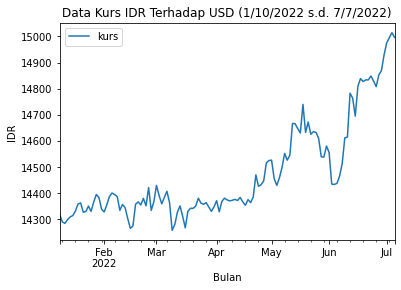

In [57]:
df.plot(title ='Data Kurs IDR Terhadap USD (1/10/2022 s.d. 7/7/2022)', ylabel='IDR', xlabel='Bulan')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Data Kurs IDR Terhadap USD (1/10/2022 s.d. 7/7/2022)'}, xlabel='Bulan', ylabel='IDR'>

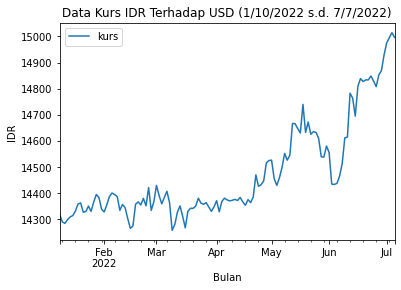

In [59]:
df.plot(title ='Data Kurs IDR Terhadap USD (1/10/2022 s.d. 7/7/2022)', ylabel='IDR', xlabel='Bulan')


(Put your analysis and conclusion here.)
Penjelasan:
1. Terjadi pelemahan nilai kurs rupiah (IDR) terhadap dollar (USD) pada 6 bulan terakhir.
2. Walapun sempat menguat pada periode bulan Mei sampai dengan Juni, tapi pada akhirnya di Juli nilai kurs rupiah terhadap dollar kembali melemah cukup tajam dan hampir menyentuh angka 15 ribu.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.